In [34]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [35]:
df = pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = "columns", inplace=True)

In [37]:
inputs = df.drop('Survived', axis = "columns")
target = df.Survived

In [38]:
inputs.Sex = inputs.Sex.map({'male' : 1,  'female' : 2})

In [39]:
inputs.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [40]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [41]:
X_train, X_test, y_train , y_test = train_test_split(inputs, target, train_size=0.75)

In [42]:
model = DecisionTreeClassifier()

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
model.score(X_test, y_test)

0.7668161434977578

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

In [49]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[107,  29],
       [ 23,  64]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

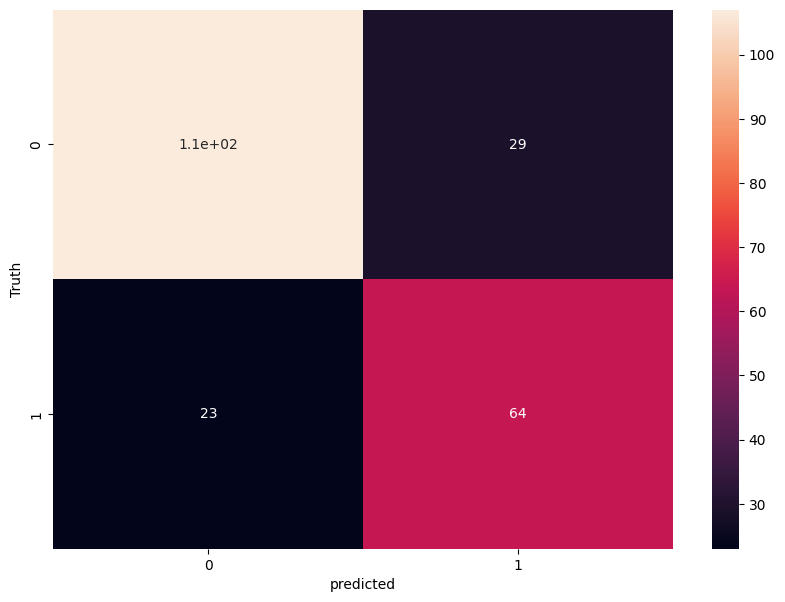

In [50]:
import seaborn as sn 
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
sn.heatmap(cm , annot=True)
plt.xlabel ('predicted')
plt.ylabel("Truth")